<a href="https://colab.research.google.com/github/shahinparvar123/Complete-Python-3-Bootcamp/blob/master/YoloV5_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:

!git clone https://github.com/draaslan/blood-cell-detection-dataset/ 



Cloning into 'blood-cell-detection-dataset'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 120 (delta 5), reused 115 (delta 5), pack-reused 0
Receiving objects: 100% (120/120), 12.10 MiB | 25.14 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:

path = "/content/blood-cell-detection-dataset/annotations.csv"
annotation = pd.read_csv(path)
annotation.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [4]:
images = annotation.image.unique()

In [5]:
train_images = images[:70]
test_images = images[70:]

In [6]:
import os
#  working_dir = '/kaggle/working'
#  train_dir = os.path.join( working_dir, 'train')
#  test_dir = os.path.join( working_dir, 'test')

In [7]:
yolo_train_dir = "/kaggle/working/yolo/train"
yolo_test_dir = "/kaggle/working/yolo/test"

for dd in [yolo_train_dir, yolo_test_dir]:
    for ss in ["images", "labels"]:
        print(os.path.join(dd, ss))
        os.makedirs(os.path.join(dd, ss), exist_ok=True)

/kaggle/working/yolo/train/images
/kaggle/working/yolo/train/labels
/kaggle/working/yolo/test/images
/kaggle/working/yolo/test/labels


In [8]:
import glob
from tqdm import tqdm
import os
import cv2  
import matplotlib.pyplot as plt

(256, 256, 3)


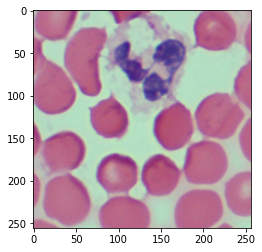

In [9]:
image = cv2.imread('/content/blood-cell-detection-dataset/images/image-1.png')
image = image[:,:,2::-1]
print(image.shape)
plt.imshow(image)

In [10]:
WIDTH = 256
HEIGHT = 256
cells_id = {
    'rbc': 0,
    'wbc': 1
}

In [11]:
cells_classes = list(cells_id.keys())
cells_classes

['rbc', 'wbc']

In [12]:
for image in train_images:
    lables_file = os.path.join(yolo_train_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))
        
for image in test_images:
    lables_file = os.path.join(yolo_test_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))

In [13]:
SIZE_W = 640
SIZE_H = 640

In [14]:
SIZE = (SIZE_W, SIZE_H)

def replace_image(src_file, dst_file, size=SIZE):
    image = cv2.imread(src_file) 
    image = cv2.resize(image, size)
    cv2.imwrite(dst_file, image)

In [15]:
train_images_dir = "/content/blood-cell-detection-dataset/images"

for image in train_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_train_dir, 'images', image)
    replace_image(src_file, dst_file)
        
for image in test_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_test_dir, 'images', image)
    replace_image(src_file, dst_file)


/kaggle/working/yolo/train/images/image-100.png
/kaggle/working/yolo/train/labels/image-100.txt


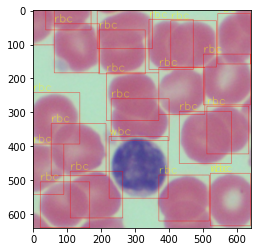

In [16]:
def draw_image(image_file, label_file, class_names):   
    image = cv2.imread(image_file)
        
    with open(label_file) as fobj:
        while True:            
            item = fobj.readline()
            if item is None or len(item)<=0:
                break
                
            item = item.split()
            
            lb = int(item[0])
            xc = float(item[1]) * SIZE_W
            yc = float(item[2]) * SIZE_H
            w = float(item[3]) * SIZE_W
            h = float(item[4]) * SIZE_H
        
            image = cv2.rectangle(image, (int(xc - w/2), int(yc - h/2)), (int(xc + w/2), int(yc + h/2)), (0,0,255), 1)
            image = cv2.putText(image, class_names[lb], (int(xc - w/2), int(yc - h/2 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 255), 1)
        
    return image

train_file = train_images[0]
image_file = os.path.join(yolo_train_dir, 'images', train_file)
label_file = os.path.join(yolo_train_dir, 'labels', train_file.replace(".png", ".txt"))

print(image_file)
print(label_file)

image = draw_image(image_file, label_file, cells_classes)
image = image[:,:,2::-1]
plt.imshow(image);

In [17]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 10208, done.
remote: Total 10208 (delta 0), reused 0 (delta 0), pack-reused 10208
Receiving objects: 100% (10208/10208), 10.53 MiB | 12.68 MiB/s, done.
Resolving deltas: 100% (7047/7047), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [18]:
!cat /content/yolov5/data/coco128.yaml

# COCO 2017 dataset http://cocodataset.org - first 128 training images
# Train command: python train.py --data coco128.yaml
# Default dataset location is next to /yolov5:
#   /parent_folder
#     /coco128
#     /yolov5


# download command/URL (optional)
download: https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ../coco128/images/train2017/  # 128 images
val: ../coco128/images/train2017/  # 128 images

# number of classes
nc: 80

# class names
names: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'basebal

In [27]:
yaml_file="/content/yolov5/data/blood_cell.yaml"

train_images_dir = os.path.join("..", yolo_train_dir, "images")
val_images_dir = os.path.join("..", yolo_test_dir, "images")


names_str=""
for item in cells_classes:
    names_str=names_str + ", \'%s\'"%item
names_str= "names: ["+names_str[1:]+"]"

with open(yaml_file, "w") as wobj:
    wobj.write("train: %s\n"%train_images_dir)
    wobj.write("val: %s\n"%val_images_dir)
    wobj.write("nc: %d\n"%len(cells_classes))
    wobj.write(names_str+"\n")

In [28]:
!pip install wandb
import wandb
wandb.login()

wandb: Currently logged in as: shaahin1 (use `wandb login --relogin` to force relogin)


True

In [31]:
%cd /content/yolov5
!bash weights/download_weights.sh

/content/yolov5
bash: weights/download_weights.sh: No such file or directory


In [32]:
!mv *.pt weights
!ls weights

mv: cannot stat '*.pt': No such file or directory
yolov5l.pt  yolov5m.pt	yolov5s.pt  yolov5x.pt


In [33]:
!python train.py --data data/blood_cell.yaml --batch-size 4 --epochs 300 --img-size 640 --project runs/train --name blood_cell --weights weights/yolov5s.pt --device 0

wandb: Currently logged in as: shaahin1 (use `wandb login --relogin` to force relogin)
train: weights=weights/yolov5s.pt, cfg=, data=data/blood_cell.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=blood_cell, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-144-gc9a46a6 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t

In [36]:
!python detect.py --weights /content/yolov5/runs/train/blood_cell/weights/best.pt --source /content/blood-cell-detection-dataset/images/image-1.png --name blood_cell --project runs/detect

detect: weights=['/content/yolov5/runs/train/blood_cell/weights/best.pt'], source=/content/blood-cell-detection-dataset/images/image-1.png, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=blood_cell, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-144-gc9a46a6 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients
image 1/1 /content/blood-cell-detection-dataset/images/image-1.png: 640x640 22 rbcs, 1 wbc, Done. (0.033s)
Speed: 0.7ms pre-process, 33.3ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/blood_cell2


In [39]:
!mkdir -p tmp
!cp /content/yolov5/runs/train/blood_cell/val_batch0_labels.jpg tmp/0.jpg
!cp /content/yolov5/runs/train/blood_cell/val_batch0_pred.jpg tmp/1.jpg
!ffmpeg -r 1 -i tmp/%d.jpg -r 1 -y tmp/out.gif

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [42]:
!ls -l /content/yolov5/runs/detect/blood_cell2

total 72
-rw-r--r-- 1 root root 70912 Dec 15 04:29 image-1.png


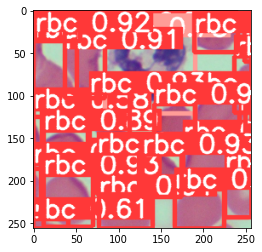

In [43]:
img = cv2.imread("/content/yolov5/runs/detect/blood_cell2/image-1.png")
plt.imshow(img[:,:,2::-1]);

In [44]:
import torch

model = torch.hub.load('/content/yolov5', 'custom', path='/content/yolov5/runs/train/blood_cell/weights/best.pt', source='local')
# Images
imgs = ['/content/blood-cell-detection-dataset/images/image-1.png']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0] 

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v6.0-144-gc9a46a6 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)




requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 256x256 22 rbcs, 1 wbc
Speed: 18.0ms pre-process, 39.0ms inference, 3.8ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs/detect/exp


,xmin,ymin,xmax,ymax,confidence,class,name
0,188.970001,0.709773,239.907013,49.265224,0.943129,0,rbc
1,127.551224,169.288925,174.369629,218.784409,0.934370,0,rbc
2,74.703270,168.487656,124.446266,216.307602,0.932499,0,rbc
3,141.915878,109.985023,189.545731,164.882385,0.932428,0,rbc
4,166.314255,210.474075,224.088211,256.000000,0.931306,0,rbc
5,66.025871,97.020805,112.997032,151.784256,0.927855,0,rbc
6,12.141360,192.639725,70.338455,254.088654,0.927027,0,rbc
7,225.365036,189.345505,256.000000,242.577179,0.925835,0,rbc
8,190.199783,96.893692,249.383820,152.207870,0.921512,0,rbc
9,175.968338,154.035370,231.414413,205.297165,0.921238,0,rbc
